# 使用自定义评分函数进行关键词提取、词频统计、词云图可视化

## 导入必要的包

In [1]:
import pandas as pd
import jieba.analyse
import math
import numpy as np
import jieba.posseg as pseg
from tqdm import tqdm
import pandas as pd
import jieba.analyse
import jieba.posseg as psg
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse
import pandas as pd
import jieba

## 读取数据与数据基础信息查看

In [2]:
raw_df = pd.read_csv(r'rawdata_reprocessed.csv')

In [3]:
raw_df.head(20)

,weibo_username,weibo_verification,weibo_content,weibo_content_preprocessed,submit_time,forward_counts,comments_counts,points_times
0,辣子鸡谁做的好吃,NaN,好像可以在自己幻想的元宇宙里过一辈子好像已经过完了一辈子双鱼座的脑子要不得,好像 幻想 元宇宙 里 一辈子 好像 完 一辈子 双鱼座 脑子 要不得,01月10日 23:59,0,0,0
1,远古的刀,NaN,反正闭关锁宇宙我们将会面临下一次的闭关锁国融入不了全球经济王峻涛跟你们讲我相信这个元宇宙真的...,反正 闭关 锁 宇宙 将会 面临 闭关锁国 融入 全球 经济 王峻涛 讲 元宇宙 真的 一下...,01月10日 23:58,32,3,0
2,暮景烟_深浅,NaN,周深先生之夜元宇宙周深拥有了生米就像拥有了梦的翅膀卡布叻周深放心飞吧生米永相随时尚先生元宇宙...,周深 之夜 元宇宙 周深 拥有 生米 拥有 梦 翅膀 卡布 叻 周深 放心 飞 生米 永 相...,01月10日 23:58,0,0,0
3,东辉毅恒传媒,NaN,王峻涛其实吧你有空可以再看看这个视频跟你们讲我相信这个元宇宙真的会来虽然不是一下子就到来还需...,王峻涛 有空 视频 讲 元宇宙 真的 一下子 到来 技术 突破 社会 讲 玩 后果 人会 分...,01月10日 23:57,0,0,0
4,在寒蝉鸣泣中等待夏日重现,NaN,敬元宇宙让基尔希斯坦的女朋友的微博视频,敬 元宇宙 基尔 希斯 坦 女朋友 微博 视频,01月10日 23:57,0,0,5
5,北北红牛一号,微博个人认证,我们在玩股票的时候首先要明白当前的市场环境大势第一顺势而为整个市场的高度从龙精药业的板并且给...,玩 股票 明白 市场 环境 大势 第一 顺势 市场 高度 从龙精 药业 板 给出 一线 逃命...,01月10日 23:56,0,0,2
6,-玫瑰骑士夢,微博个人认证,朝元気芋泥萄萄宇宙小居民黄仁俊元气活泼跑起来会扬起耳朵的小帕恰签售时挑战的可爱笨笨金色卷卷珍...,元 気 芋 泥 萄 萄 宇宙 居民 黄仁俊 元气 活泼 跑 扬起 耳朵 小帕恰 签售 时 挑...,01月10日 23:56,0,0,0
7,成都仁寿商会,NaN,元宇宙成苹果禁区将发布首款头显月日消息苹果公司预计将于今年发布其首款混合现实头戴设备彭博社记...,元宇宙 成 苹果 禁区 发布 首款 头显 月 日 消息 苹果公司 预计 发布 首款 混合 现...,01月10日 23:56,0,0,0
8,是个吃货叻,NaN,帅帅帅冲浪的紅豆鯊啊啊啊太帅了卡布叻周深周深星星瞭望塔周深时尚先生周深先生之夜元宇宙勇敢突破...,帅帅帅 冲浪 紅豆 鯊 啊啊啊 太帅 卡布 叻 周深 周深 星星 瞭望 塔周 深 时尚 周深...,01月10日 23:55,0,0,1026193
9,是个吃货叻,NaN,周深啊啊啊啊冲浪的紅豆鯊啊啊啊太帅了卡布叻周深周深星星瞭望塔周深时尚先生周深先生之夜元宇宙勇...,周深 啊啊啊 冲浪 紅豆 鯊 啊啊啊 太帅 卡布 叻 周深 周深 星星 瞭望 塔周 深 时尚...,01月10日 23:55,0,0,1026193


## 进行词频统计与关键词提取

In [49]:
word_count = {}
# contents = raw_df['weibo_content_preprocessed'].values
# for line in tqdm(contents):
#     words = str(line).split(' ')
#     for word in words:
#         if word_count.get(word) is None:
#             word_count[word] = 1
#         else:
#             word_count[word] = word_count[word]+1

词语重要性 ：  
认证：普通用户博文中出现：1分，个人认证博文中出现：3分，官方认证博文中出现：9分  
转评赞数据：ceil(1xlog(点赞数+1)),ceil(3xlog(评论数+1)),ceil(5xlog(转发数+1))

In [50]:
def auth_map(x):
    if x == '微博个人认证':
        return 3
    elif x == '微博官方认证':
        return 9
    else:
        return 1
        

In [51]:
def get_score(df):
    score1 = df['points_times'].map(float).map(lambda x:math.ceil(math.log10(x+1)))
    score2 = df['comments_counts'].map(float).map(lambda x:3*math.ceil(math.log10(x+1)))
    score3 = df['forward_counts'].map(float).map(lambda x:5*math.ceil(math.log10(x+1)))
    score4 = df['weibo_verification'].map(auth_map)
    score = score1+score2+score3+score4
    return score

### 获取每一条微博的权重

In [52]:
scores = get_score(raw_df)
scores

0          1
1         14
2          1
3          1
4          2
          ..
132199     1
132200     5
132201     8
132202     1
132203     1
Length: 132204, dtype: int64

In [53]:
pos_allow=['d','n','ns','nr','x','vn']
jieba.load_userdict('./userdic.txt')

In [54]:
def pos_filter(line:str,pos_list):
    words = pseg.cut(str(line))
    ret_words = []
    for word,pos in words:
        if word.strip() is not ''  and pos in pos_list :
            ret_words.append(word)
    return ret_words


In [55]:
print(pos_filter('好像 幻想 元宇宙 里 一辈子 好像 完 一辈子 双鱼座 脑子 要不得',pos_allow))

['幻想', '元宇宙', '脑子']


### 关键词提取与词频统计

In [56]:
keywords = dict()
contents = raw_df['weibo_content_preprocessed'].values
for line,score in  tqdm(zip(contents,scores),total=len(scores)):
    # words = str(line).split(' ')
    words = pos_filter(line,pos_allow)
    for word in words:
        if keywords.get(word) is None:
            keywords[word] = score
        else:
            keywords[word] = keywords[word]+score
        
        if word_count.get(word) is None:
            word_count[word] = 1
        else:
            word_count[word] = word_count[word]+1

100%|██████████| 132204/132204 [18:43<00:00, 117.70it/s]


## 关键词可视化

In [57]:
sorted_kw_dic = sorted(keywords.items(),key=lambda x:x[1],reverse=True)

In [58]:
words_frequence = dict()
for i in range(50):
    words_frequence[sorted_kw_dic[i][0]] = sorted_kw_dic[i][1]
    print(sorted_kw_dic[i])
    

('元宇宙', 1253941)
('数字', 219828)
('板块', 169289)
('公司', 166277)
('科技', 145733)
('市场', 144216)
('游戏', 141704)
('博', 138929)
('概念', 134401)
('技术', 130308)
('视频', 123068)
('世界', 120218)
('宇宙', 115196)
('链接', 114956)
('股份', 101712)
('发展', 100481)
('网页', 100385)
('区块', 99274)
('链', 98543)
('平台', 96583)
('币', 93274)
('中国', 88953)
('投资', 85720)
('行业', 77912)
('项目', 72632)
('资金', 67973)
('机会', 64881)
('藏品', 61611)
('现实', 59984)
('经济', 59504)
('行情', 57754)
('全球', 57061)
('互联网', 56280)
('时间', 56272)
('领域', 54710)
('产品', 54643)
('个股', 53355)
('方向', 52531)
('体验', 52334)
('指数', 51934)
('企业', 51579)
('股票', 51557)
('产业', 51183)
('货币', 50009)
('空间', 49895)
('财经', 49673)
('数据', 47371)
('社区', 46818)
('汽车', 46393)
('时代', 46160)


In [59]:
words_frequence

{'元宇宙': 1253941,
 '数字': 219828,
 '板块': 169289,
 '公司': 166277,
 '科技': 145733,
 '市场': 144216,
 '游戏': 141704,
 '博': 138929,
 '概念': 134401,
 '技术': 130308,
 '视频': 123068,
 '世界': 120218,
 '宇宙': 115196,
 '链接': 114956,
 '股份': 101712,
 '发展': 100481,
 '网页': 100385,
 '区块': 99274,
 '链': 98543,
 '平台': 96583,
 '币': 93274,
 '中国': 88953,
 '投资': 85720,
 '行业': 77912,
 '项目': 72632,
 '资金': 67973,
 '机会': 64881,
 '藏品': 61611,
 '现实': 59984,
 '经济': 59504,
 '行情': 57754,
 '全球': 57061,
 '互联网': 56280,
 '时间': 56272,
 '领域': 54710,
 '产品': 54643,
 '个股': 53355,
 '方向': 52531,
 '体验': 52334,
 '指数': 51934,
 '企业': 51579,
 '股票': 51557,
 '产业': 51183,
 '货币': 50009,
 '空间': 49895,
 '财经': 49673,
 '数据': 47371,
 '社区': 46818,
 '汽车': 46393,
 '时代': 46160}

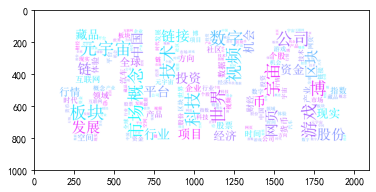

In [60]:

backgroud_Image=plt.imread(r'./METAVERSE3.jpg')
# 若是有中文的话，font_path ='simsun.ttc'必须添加，不然会出现方框，不出现汉字
# simsun.ttc为汉字编码文件，可以从本地windows系统找一个汉字编码文件上传， 如C:\\Windows\Fonts下有许多汉字编码文件
wordcloud = WordCloud(font_path ='simsun.ttc',repeat=True,mask=backgroud_Image,background_color='white',width=2000,height=1000,colormap='cool')
wordcloud = wordcloud.fit_words(words_frequence)
wordcloud.to_file('wordcloud_myscoring.png')
plt.imshow(wordcloud)

## 词频可视化

99192
('元宇宙', 205648)
('数字', 32422)
('板块', 32068)
('市场', 25735)
('公司', 25269)
('概念', 22935)
('游戏', 22496)
('科技', 22175)
('技术', 20202)
('世界', 19972)
('宇宙', 19764)
('博', 19030)
('刘宇', 18907)
('股份', 18682)
('区块', 16620)
('链', 16271)
('发展', 16059)
('链接', 15898)
('币', 15720)
('视频', 15678)
('平台', 14791)
('中国', 13560)
('投资', 13125)
('资金', 12942)
('网页', 12778)
('行业', 12605)
('项目', 11869)
('个股', 11369)
('机会', 10871)
('指数', 10713)


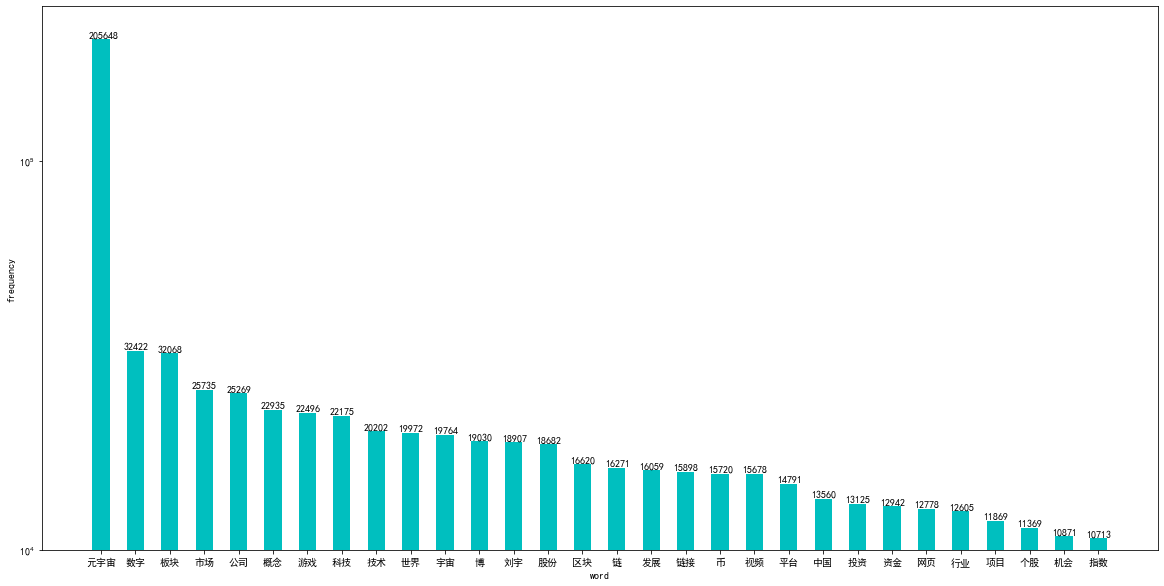

In [61]:
print(len(word_count))
sorted_wc_dic = sorted(word_count.items(),key=lambda x:x[1],reverse=True)
x_word = []
y_count = []
for i in range(30):
    x_word.append(sorted_wc_dic[i][0])
    y_count.append(sorted_wc_dic[i][1])
    print(sorted_wc_dic[i])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.35, 1.01*height, '%s' % int(height))

plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'
rects = plt.bar(x_word,y_count,width=0.5,color="c")
plt.xlabel("word")
plt.ylabel("frequency")
plt.yscale('symlog')
plt.ylim(10000,250000)
autolabel(rects)